# **Feature Engineering** - 

## **Label Encoding and OneHot Encoder**


### Introduction:

In the realm of predictive modeling and machine learning, encoding categorical variables is a crucial step in preparing data for analysis. Categorical variables, such as "town" in our dataset, represent qualitative data and cannot be directly used in mathematical models. Therefore, they need to be converted into numerical representations that machine learning algorithms can handle.

Two common encoding techniques are Label Encoding and OneHot Encoding. Label Encoding assigns a unique integer to each category, while OneHot Encoding creates binary columns for each category, representing its presence or absence.
Description:

In this scenario, I conducted an experiment where we applied Label Encoding and OneHot Encoding to the "town" variable in a dataset containing information about housing prices. The dataset also includes the "area" variable as a predictor of housing prices.

After encoding the categorical variable, we built two separate linear regression models:

    Model 1: Label Encoding
    Model 2: OneHot Encoding

 Evaluated the performance of each model by examining their R-squared values, which measure the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (features). A higher R-squared value indicates a better fit of the model to the data.

***label encoding and one-hot encoding are both techniques used to convert categorical data into numerical format for machine learning algorithms. The choice between them depends on the nature of the categorical variable and whether there is an ordinal relationship among its categories***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

## **I. Label Encoding**

### 1. Creating Categorical independent Varible  - Text to Numberic - Using Pandas

In [2]:
homeprices = pd.read_csv('homeprices.csv')
homeprices

,town,area,price
0,chennai,2600,550000
1,chennai,3000,565000
2,chennai,3200,610000
3,chennai,3600,680000
4,chennai,4000,725000
5,Delhi,2600,585000
6,Delhi,2800,615000
7,Delhi,3300,650000
8,Delhi,3600,710000
9,Bangalore,2600,575000


In [3]:
homeprices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [4]:
homeprices['town'] = homeprices['town'].astype('category')
homeprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   town    13 non-null     category
 1   area    13 non-null     int64   
 2   price   13 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 485.0 bytes


In [5]:
homeprices['town'] =homeprices['town'].cat.codes

In [6]:
homeprices =  homeprices[['price','town','area']]
homeprices

,price,town,area
0,550000,2,2600
1,565000,2,3000
2,610000,2,3200
3,680000,2,3600
4,725000,2,4000
5,585000,1,2600
6,615000,1,2800
7,650000,1,3300
8,710000,1,3600
9,575000,0,2600


### 2. Creating Categorical independent Varible  - Text to Numberic - Using SKlearn **(Optional)**

In [7]:
le =  LabelEncoder()

In [8]:
homeprices_2 =  pd.read_csv('homeprices.csv')
homeprices_2.town = le.fit_transform(homeprices_2.town)
homeprices_2

,town,area,price
0,2,2600,550000
1,2,3000,565000
2,2,3200,610000
3,2,3600,680000
4,2,4000,725000
5,1,2600,585000
6,1,2800,615000
7,1,3300,650000
8,1,3600,710000
9,0,2600,575000


# **Model Construct and Finding R-Squared Value using Label Encoding**

In [9]:
ols_data = homeprices
ols_formula = ('price ~ town + area')
OLS = ols(formula = ols_formula, data = ols_data )
model1  = OLS.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     48.63
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           7.05e-06
Time:                        15:28:57   Log-Likelihood:                -145.01
No. Observations:                  13   AIC:                             296.0
Df Residuals:                      10   BIC:                             297.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.535e+05    3.9e+04      6.505      0.000    1.67e+05     3.4e+05
town       -1.344e+04   6620.995     -2.030      0.070   -2.82e+04    1311.703
area         124.0242     12.579      9.860      0.000      95.998     152.051
==============================================================================
Omnibus:                        0.012   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.168
Skew:                          -0.051   Prob(JB):                        0.919
Kurtosis:                       2.453   Cond. No.                     2.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dependent Variable (Response Variable):price

Model: Ordinary Least Squares (OLS)

**R-squared: 0.907**

This indicates that approximately 90.7% of the variability in the response variable (price) is explained by the predictor variables (town and area) in the model.

Adjusted R-squared: 0.888

    This is the adjusted version of R-squared, which adjusts for the number of predictor variables in the model.
    
The regression formula based on the coefficients provided is:

**Price = 253500 + (-13440 × Town) + (124.0242 × Area)**

Here, "Town" and "Area" are the predictor variables, and "Price" is the response variable (dependent variable). The coefficients represent the effect of each predictor variable on the response variable.

- For the "Town" variable, the coefficient is -13440, indicating that for every unit increase in the town variable, the price decreases by $13440.
    
- For the "Area" variable, the coefficient is 124.0242, indicating that for every unit increase in the area variable, the price increases by $124.0242.

This formula represents a multiple linear regression model, where the price is predicted based on both the town and area variables.




## **Scatter plot with a regression line showing the relationship between price and area**

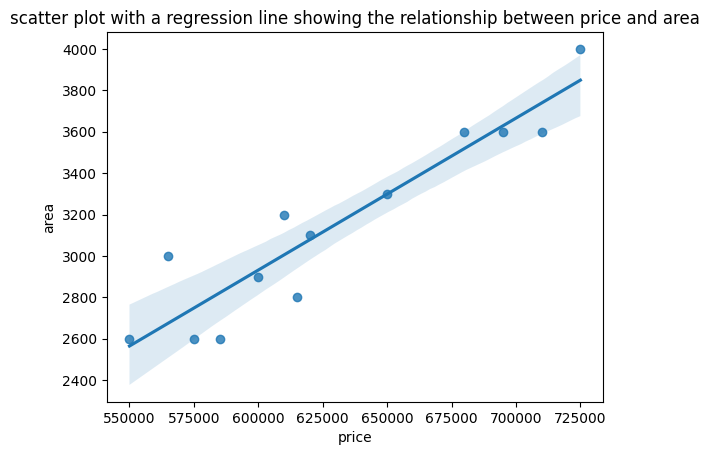

In [10]:
sns.regplot(x='price',y='area',data = homeprices)
plt.title('scatter plot with a regression line showing the relationship between price and area')
plt.show()


### **Analyzing residuals is important in regression analysis because it helps to assess the goodness-of-fit of the model**

In [11]:
residual1 = model1.resid

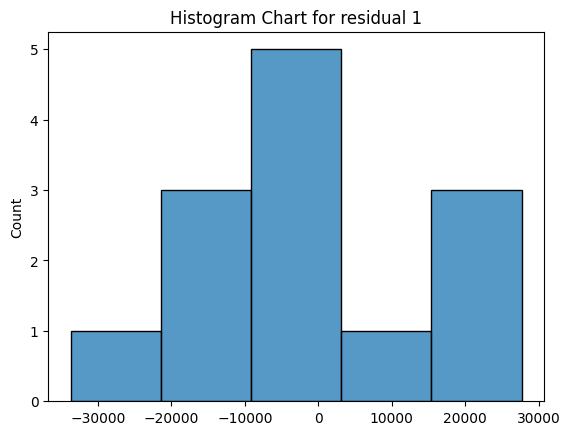

In [12]:
sns.histplot(residual1)
plt.title('Histogram Chart for residual 1')
plt.show()

    If the residuals are positive: It means that the actual values (dependent variable) are higher than what the model predicted. In other words, the model underestimated these observations.

    If the residuals are negative: It means that the actual values are lower than what the model predicted. In this case, the model overestimated these observations.

In this case, some residuals are positive, indicating that the model underestimated those particular observations, while others are negative, suggesting that the model overestimated those observations. The magnitude of the residuals also provides information about the extent of the model's errors for each observation.

Analyzing residuals is important in regression analysis because it helps to assess the goodness-of-fit of the model. Ideally, residuals should be randomly distributed around zero with no discernible pattern. If there are systematic patterns or trends in the residuals, it suggests that the model might be misspecified or missing important variables.

You can visualize the residuals using plots like a residual plot or a QQ plot to further examine their distribution and identify any patterns or outliers.

   

## Assessing Residual Normality with Q-Q Plot

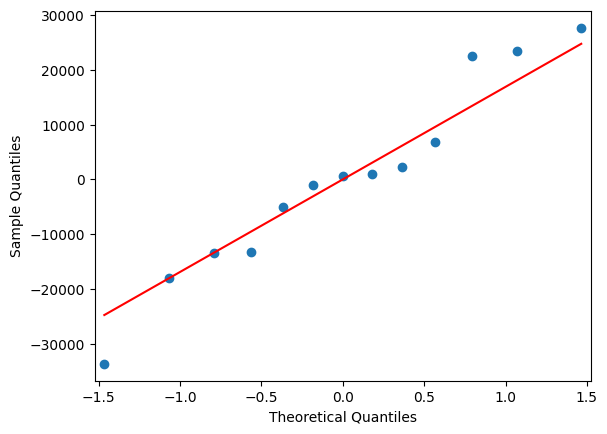

In [13]:
sm.qqplot(residual1,line='s')
plt.show()

The sm.qqplot(residual2, line='s') function creates a plot that helps us see if the differences between the actual and predicted values (called residuals) are normally distributed.

Here's what it does:

    Comparison with the Normal Distribution: It compares these differences with what we'd expect if they followed a normal (bell-shaped) distribution.

    Checking for Normality: If the differences follow a straight line in the plot, it suggests they're close to what we'd expect from a normal distribution. If the line deviates a lot, it indicates the differences might not be normally distributed.

    Assessment Tool: This plot is useful for checking if our regression model's assumptions hold true. If the differences aren't normally distributed, it might affect the reliability of our model's predictions.

## Model 1 Prediction  

**for Prediction - homeprices dataset**

In [14]:
# Predict the prices of new entries using your trained model
predicted_prices1 = model1.predict(homeprices)

# Add the predicted prices to the new entries DataFrame
homeprices['predicted_price1'] = predicted_prices1.round()

homeprices['predicted_percentage_variation1'] = 100-round((homeprices['predicted_price1'] / homeprices['price']) * 100,2)

# Print the new entries DataFrame with predicted prices
homeprices

,price,town,area,predicted_price1,predicted_percentage_variation1
0,550000,2,2600,549088.0,0.17
1,565000,2,3000,598697.0,-5.96
2,610000,2,3200,623502.0,-2.21
3,680000,2,3600,673112.0,1.01
4,725000,2,4000,722721.0,0.31
5,585000,1,2600,562528.0,3.84
6,615000,1,2800,587333.0,4.50
7,650000,1,3300,649345.0,0.10
8,710000,1,3600,686553.0,3.30
9,575000,0,2600,575969.0,-0.17


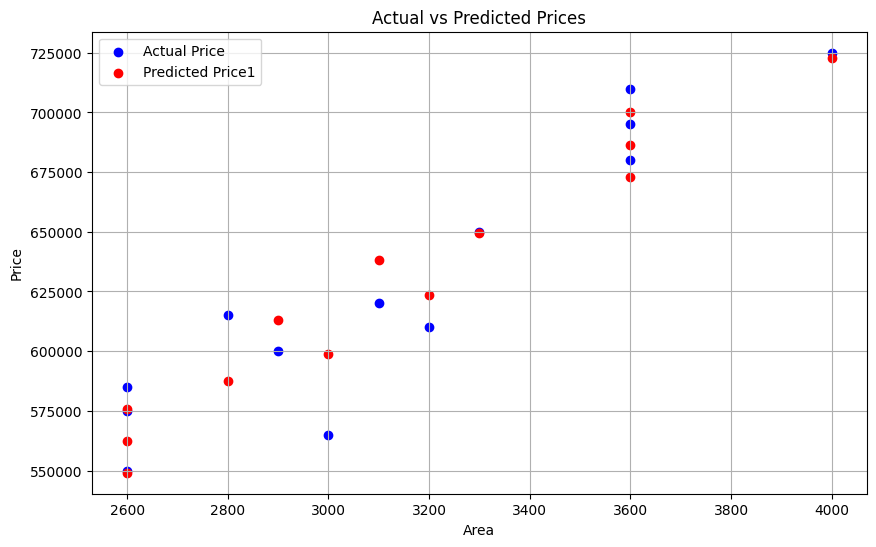

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(homeprices['area'],homeprices['price'], color='blue', label='Actual Price')
plt.scatter(homeprices['area'],homeprices['predicted_price1'], color='red', label='Predicted Price1')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## **II. OneHot Encoder**

###  Creating Categorical independent Varible  - Text to Numberic - Using Pandas - Get_Dummies

In [16]:
data = pd.read_csv('homeprices.csv')
data

,town,area,price
0,chennai,2600,550000
1,chennai,3000,565000
2,chennai,3200,610000
3,chennai,3600,680000
4,chennai,4000,725000
5,Delhi,2600,585000
6,Delhi,2800,615000
7,Delhi,3300,650000
8,Delhi,3600,710000
9,Bangalore,2600,575000


In [17]:
dummies = pd.get_dummies(data ['town'], prefix='town').astype(int)
dummies 

,town_Bangalore,town_Delhi,town_chennai
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [18]:
homeprices_one = pd.concat([data,dummies],axis=1)
homeprices_one = homeprices_one.drop('town',axis=1)
homeprices_one = homeprices_one[['price','area','town_Bangalore','town_Delhi','town_chennai']]
homeprices_one

,price,area,town_Bangalore,town_Delhi,town_chennai
0,550000,2600,0,0,1
1,565000,3000,0,0,1
2,610000,3200,0,0,1
3,680000,3600,0,0,1
4,725000,4000,0,0,1
5,585000,2600,0,1,0
6,615000,2800,0,1,0
7,650000,3300,0,1,0
8,710000,3600,0,1,0
9,575000,2600,1,0,0


# **Model Construct and Finding R-Squared Value using OneHot Encoder**

In [19]:
ols_data = homeprices_one
ols_formula = ('price ~ town_Bangalore + town_Delhi + town_chennai + area')
OLS = ols(formula = ols_formula, data = ols_data )
model2  = OLS.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     67.41
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.73e-06
Time:                        15:28:59   Log-Likelihood:                -139.92
No. Observations:                  13   AIC:                             287.8
Df Residuals:                       9   BIC:                             290.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.738e+05   2.14e+04      8.131      0.000    1.25e+05    2.22e+05
town_Bangalore  6.171e+04   8451.675      7.301      0.000    4.26e+04    8.08e+04
town_Delhi      7.603e+04   8620.628      8.820      0.000    5.65e+04    9.55e+04
town_chennai    3.602e+04   9852.734      3.656      0.005    1.37e+04    5.83e+04
area             126.8974      9.006     14.090      0.000     106.524     147.271
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.863
Skew:                          -0.920   Prob(JB):                        0.394
Kurtosis:                       2.763   Cond. No.                     5.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Here's the regression formula based on the provided coefficients:

**Price=173,800+(61,710×town_Bangalore)+(76,030×town_Delhi)+(36,020×town_chennai)+(126.90×Area)**

Now, let's explain the formula:

    Intercept: The intercept term represents the baseline price when all predictor variables are set to zero. In this case, it's $173,800. It indicates the expected price when the house is not located in Bangalore, Delhi, or Chennai, and when the area is zero.

    town_Bangalore Coefficient: This coefficient of $61,710 represents the additional price associated with a house located in Bangalore compared to the reference location (which is not explicitly mentioned).

    town_Delhi Coefficient: Similarly, the coefficient of $76,030 represents the additional price associated with a house located in Delhi compared to the reference location.

    town_chennai Coefficient: The coefficient of $36,020 represents the additional price associated with a house located in Chennai compared to the reference location.

    Area Coefficient: The coefficient of 126.90 indicates that for each unit increase in the area (in whatever unit it is measured), the price is expected to increase by $126.90, assuming all other variables remain constant.

So, the regression formula predicts the price of a house based on its location (Bangalore, Delhi, Chennai) and its area. The coefficients for each town indicate the additional price associated with houses in those locations compared to the reference location.

## **Scatter plot with a regression line showing the relationship between price and area**

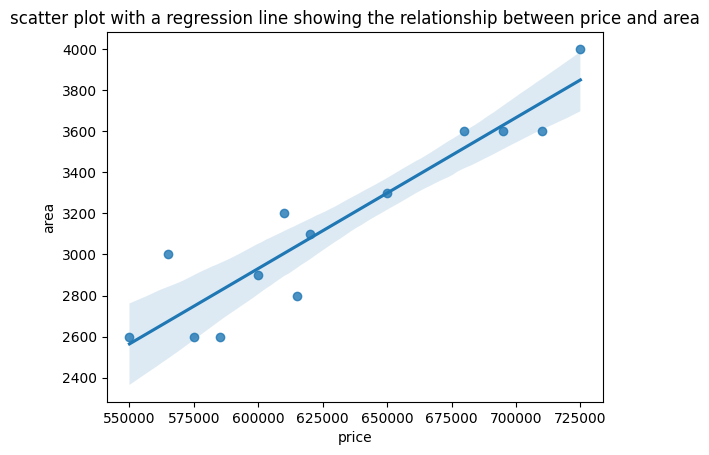

In [20]:
sns.regplot(x='price',y='area',data = homeprices_one)
plt.title('scatter plot with a regression line showing the relationship between price and area')
plt.show()

### **Analyzing residuals is important in regression analysis because it helps to assess the goodness-of-fit of the model**

In [21]:
residual2 = model2.resid

In [22]:
residual2 

0     10290.260159
1    -25468.716405
2     -5848.204687
3     13392.818749
4      7633.842185
5      5276.284670
6      9896.796388
7    -18551.924317
8      3378.843260
9      9603.848635
10    -3465.383788
11    -8844.872070
12     2706.407224
dtype: float64

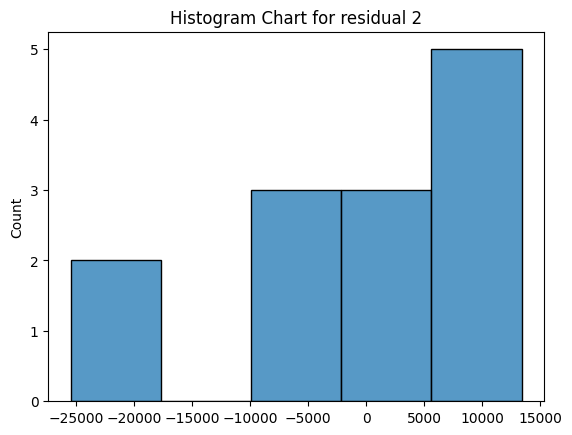

In [23]:
sns.histplot(residual2)
plt.title('Histogram Chart for residual 2')
plt.show()

The residual values represent the differences between the actual prices and the predicted prices from a regression model. 

To create a histogram summarizing these residual values, we can visualize the distribution of these discrepancies. 

Here's a summary of what observed from the histogram of the provided residual values:

    The histogram will display the frequency distribution of the residuals.
    
    Positive residuals indicate that the model overestimated the prices, while negative residuals indicate underestimation.
    
    The shape of the histogram can provide insights into the model's performance and the distribution of prediction errors.
    
    Ideally, we would want the residuals to be normally distributed around zero, indicating that the model's predictions are unbiased and consistent across different price levels.
    

## Assessing Residual Normality with Q-Q Plot

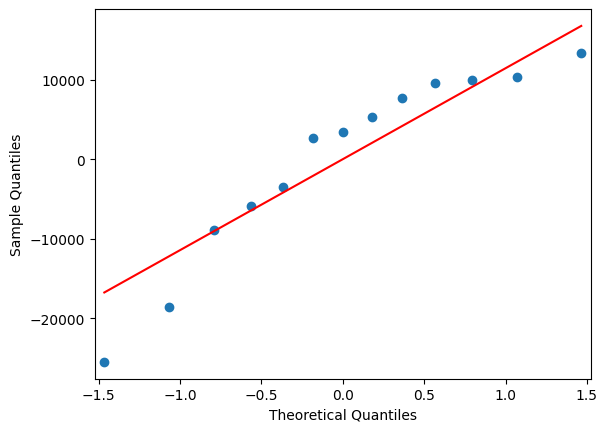

In [24]:
sm.qqplot(residual2,line='s')
plt.show()

The sm.qqplot(residual2, line='s') function creates a plot that helps us see if the differences between the actual and predicted values (called residuals) are normally distributed.

Here's what it does:

    Comparison with the Normal Distribution: It compares these differences with what we'd expect if they followed a normal (bell-shaped) distribution.

    Checking for Normality: If the differences follow a straight line in the plot, it suggests they're close to what we'd expect from a normal distribution. If the line deviates a lot, it indicates the differences might not be normally distributed.

    Assessment Tool: This plot is useful for checking if our regression model's assumptions hold true. If the differences aren't normally distributed, it might affect the reliability of our model's predictions.

## Model 2 Prediction  

**for Prediction - homeprices_one dataset**

In [25]:

# Predict the prices of new entries using your trained model
predicted_prices2 = model2.predict(homeprices_one)

# Add the predicted prices to the new entries DataFrame
homeprices_one['predicted_price2'] = predicted_prices2.round()

homeprices_one['predicted_percentage_variation2'] = 100-round((homeprices_one['predicted_price2'] / homeprices_one['price']) * 100,2)

# Print the new entries DataFrame with predicted prices
homeprices_one

,price,area,town_Bangalore,town_Delhi,town_chennai,predicted_price2,predicted_percentage_variation2
0,550000,2600,0,0,1,539710.0,1.87
1,565000,3000,0,0,1,590469.0,-4.51
2,610000,3200,0,0,1,615848.0,-0.96
3,680000,3600,0,0,1,666607.0,1.97
4,725000,4000,0,0,1,717366.0,1.05
5,585000,2600,0,1,0,579724.0,0.90
6,615000,2800,0,1,0,605103.0,1.61
7,650000,3300,0,1,0,668552.0,-2.85
8,710000,3600,0,1,0,706621.0,0.48
9,575000,2600,1,0,0,565396.0,1.67


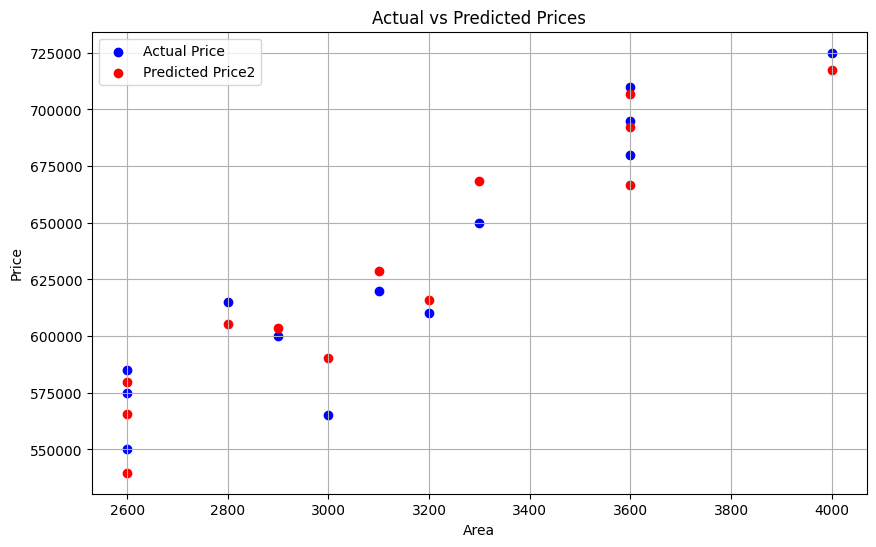

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(homeprices_one['area'],homeprices_one['price'], color='blue', label='Actual Price')
plt.scatter(homeprices_one['area'], homeprices_one['predicted_price2'], color='red', label='Predicted Price2')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# **Conclusion:**

The R-squared values for Label Encoding and OneHot Encoder models:

**Label Encoding -  Model 1: R-squared = 0.907 and**

**OneHot Encoder -  Model 2: R-squared = 0.957**

These R-squared values indicate the proportion of the variance in the dependent variable (price) that is predictable from the independent variables (features) in each model.

Comparing the two R-squared values:

    -Model 2 (R-squared = 0.957) has a higher R-squared value compared to Model 1 (R-squared = 0.907).
    
    -This suggests that Model 2 explains more of the variance in the price compared to Model 1.
    
    -In other words, Model 2 provides a better fit to the data compared to Model 1.

A higher R-squared value generally indicates a better fit of the model to the data, although it's important to consider other factors such as model complexity and the specific context of the analysis.